In [3]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb


from keras.layers import GRU

import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
from sklearn import model_selection

Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'1.15.2'

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

SimpleRNN

In [7]:
max_features = 2000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
hidden_dims = 8

In [9]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(
    SimpleRNN(units=hidden_dims, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.5498 - accuracy: 0.7316 - val_loss: 0.5094 - val_accuracy: 0.7647
Epoch 2/10
25000/25000 [==============================] - 67s 3ms/step - loss: 0.4550 - accuracy: 0.7961 - val_loss: 0.4723 - val_accuracy: 0.7904
Epoch 3/10
25000/25000 [==============================] - 68s 3ms/step - loss: 0.3861 - accuracy: 0.8375 - val_loss: 0.4763 - val_accuracy: 0.7850
Epoch 4/10
25000/25000 [==============================] - 69s 3ms/step - loss: 0.3296 - accuracy: 0.8676 - val_loss: 0.4754 - val_accuracy: 0.7927
Epoch 5/10
25000/25000 [==============================] - 67s 3ms/step - loss: 0.2914 - accuracy: 0.8848 - val_loss: 0.5060 - val_accuracy: 0.7900
Epoch 6/10
25000/25000 [==============================] - 67s 3ms/step - loss: 0.2637 - accuracy: 0.8974 - val_loss: 0.5400 - val_accuracy: 0.7728
Epoch 7/10
25000/25000 [==============================] - 67s 3ms/st

GRU

In [10]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(
    GRU(units=hidden_dims, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4974 - accuracy: 0.7499 - val_loss: 0.4056 - val_accuracy: 0.8206
Epoch 2/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3618 - accuracy: 0.8434 - val_loss: 0.3635 - val_accuracy: 0.8412
Epoch 3/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.3091 - accuracy: 0.8694 - val_loss: 0.3527 - val_accuracy: 0.8456
Epoch 4/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2693 - accuracy: 0.8898 - val_loss: 0.3792 - val_accuracy: 0.8400
Epoch 5/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2373 - accuracy: 0.9069 - val_loss: 0.3841 - val_accuracy: 0.8397
Epoch 6/10
25000/25000 [==============================] - 34s 1ms/step - loss: 0.2069 - accuracy: 0.9205 - val_loss: 0.4008 - val_accuracy: 0.8354
Epoch 7/10
25000/25000 [==============================] - 3

LSTM

In [11]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 109s 4ms/step - loss: 0.4806 - accuracy: 0.7680 - val_loss: 0.4240 - val_accuracy: 0.8086
Epoch 2/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.3941 - accuracy: 0.8258 - val_loss: 0.3943 - val_accuracy: 0.8271
Epoch 3/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.3580 - accuracy: 0.8435 - val_loss: 0.4273 - val_accuracy: 0.8234
Epoch 4/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.3281 - accuracy: 0.8592 - val_loss: 0.3745 - val_accuracy: 0.8346
Epoch 5/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.3048 - accuracy: 0.8684 - val_loss: 0.3825 - val_accuracy: 0.8396
Epoch 6/10
25000/25000 [==============================] - 112s 4ms/step - loss: 0.2813 - accuracy: 0.8826 - val_loss: 0.3932 - val_accuracy: 0.8398
Epoch 7/10
25000/25000 [==============

ConvLSTM2D

In [10]:
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv3D

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))

seq.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=3,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 66s 3ms/step - loss: 0.1864 - accuracy: 0.9336 - val_loss: 0.6314 - val_accuracy: 0.7767
Epoch 2/3
25000/25000 [==============================] - 67s 3ms/step - loss: 0.1824 - accuracy: 0.9353 - val_loss: 0.6658 - val_accuracy: 0.7722
Epoch 3/3
25000/25000 [==============================] - 6s 246us/step
Test score: 0.7025236091566086
Test accuracy: 0.7706800103187561


Train on 950 samples, validate on 50 samples
Epoch 1/10
950/950 [==============================] - 118s 124ms/step - loss: 0.2353 - accuracy: 0.9170 - val_loss: 0.4970 - val_accuracy: 0.7138
Epoch 2/10
950/950 [==============================] - 108s 114ms/step - loss: 0.0216 - accuracy: 0.9963 - val_loss: 0.4758 - val_accuracy: 0.8171
Epoch 3/10
950/950 [==============================] - 109s 114ms/step - loss: 0.0179 - accuracy: 0.9963 - val_loss: 0.2162 - val_accuracy: 0.9399
Epoch 4/10
950/950 [==============================] - 108s 114ms/step - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.2380 - val_accuracy: 0.9414
Epoch 5/10
950/950 [==============================] - 109s 115ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.1745 - val_accuracy: 0.9445
Epoch 6/10
950/950 [==============================] - 109s 115ms/step - loss: 8.7109e-04 - accuracy: 0.9998 - val_loss: 0.0298 - val_accuracy: 0.9878
Epoch 7/10
950/950 [==============================] - 109s 115ms/step - los

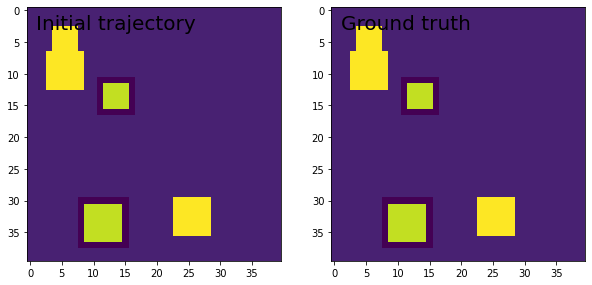

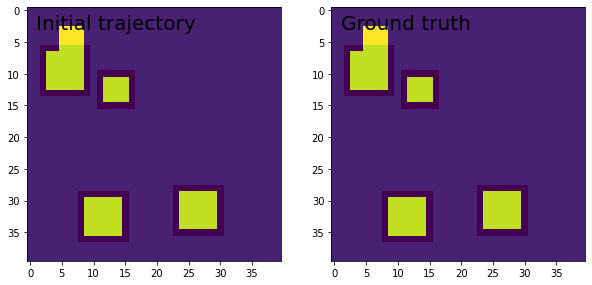

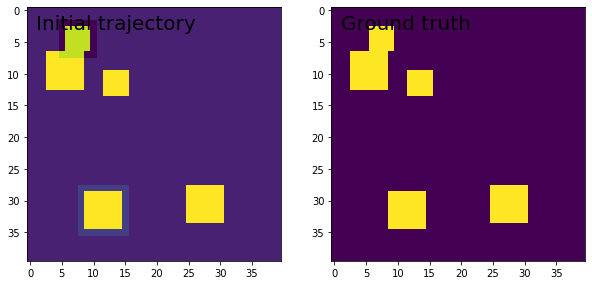

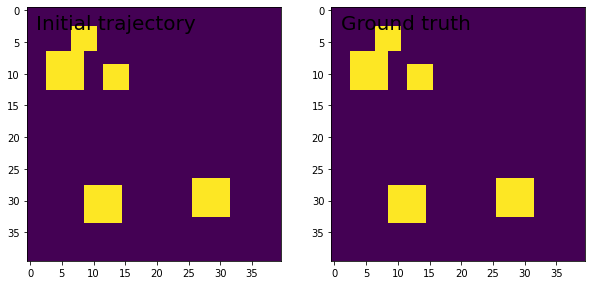

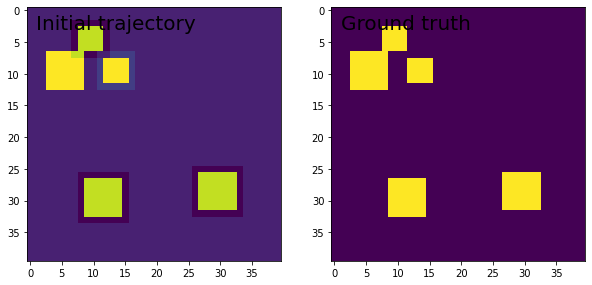

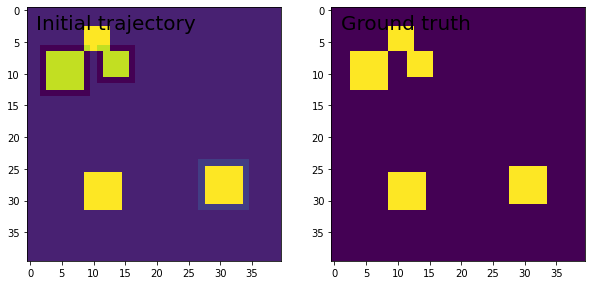

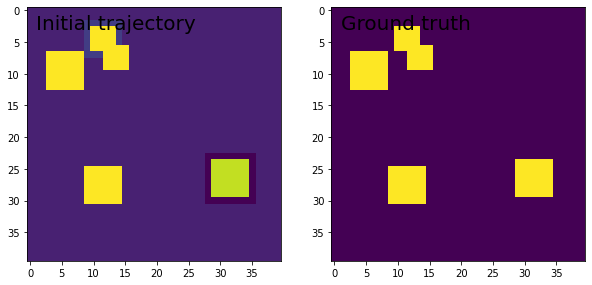

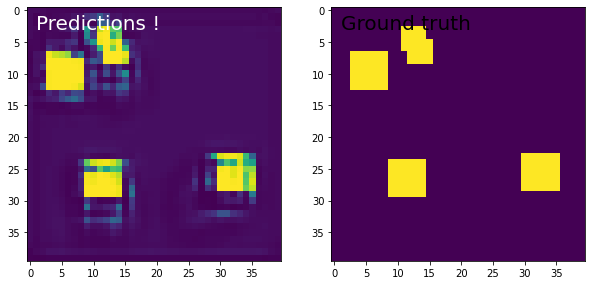

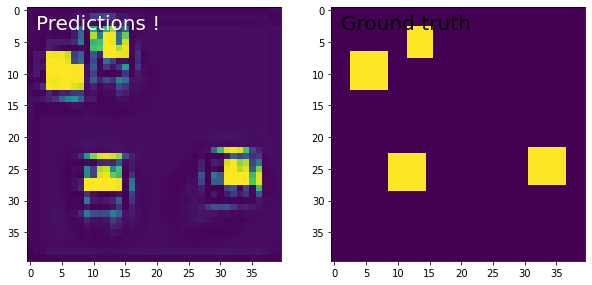

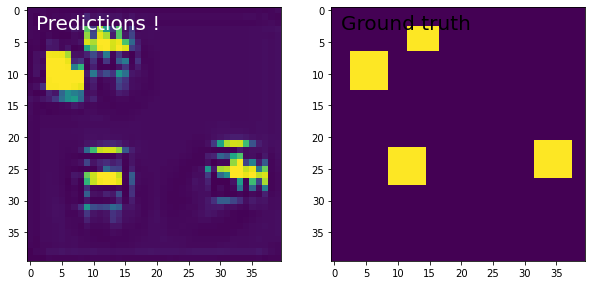

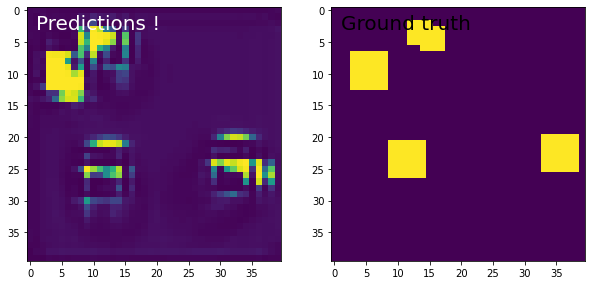

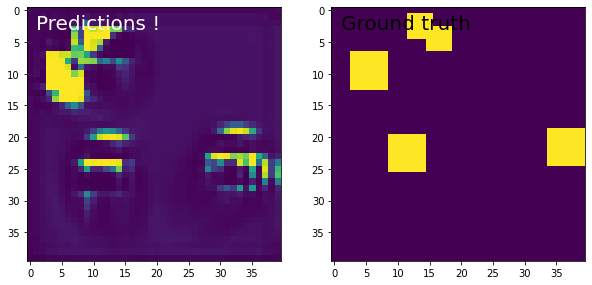

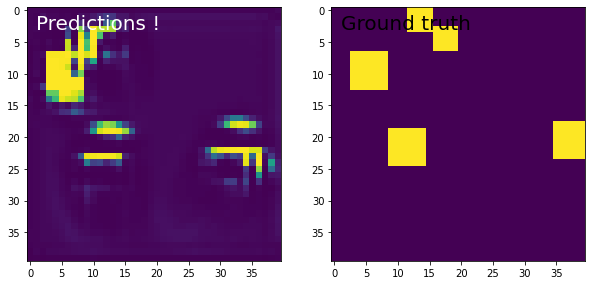

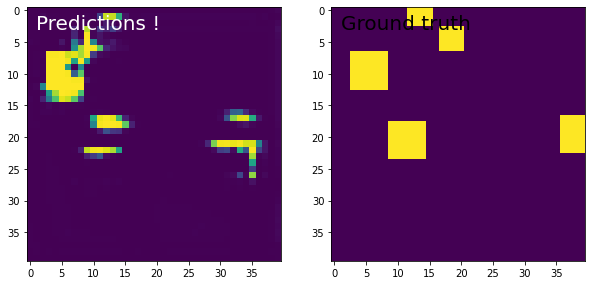

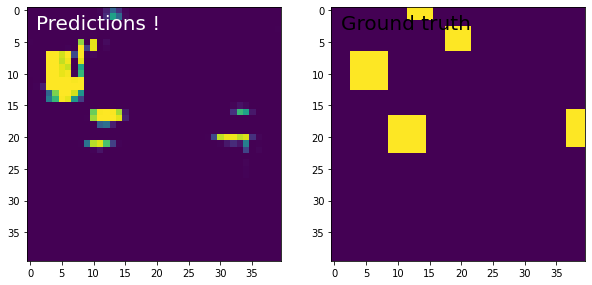

In [11]:
import matplotlib.pyplot as plt

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=10, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

RNN : 一般的なリカレントニューラル　\

SimpleRNNCell : 出力が入力にフィードバックされる全結合RNN．　\

GRUCell : \
GRUレイヤーのためのCellクラス
ゲートのあるリカレントユニット
デフォルトは1406.1078v3を基にしたもので，行列の乗算の前に隠れ状態にリセットゲートを適用
もうひとつオリジナルである1406.1078v1をベースにしているもので，処理の順番が逆

LSTMCell :\
LSTMレイヤーのためのcellクラス
長短期記憶ユニット
他のクラスとは違い、unit_forget_biasで真理値．Trueなら，初期化時に忘却ゲートのバイアスに1を加えルことができるなど、忘却バイアスの設定が必要


StackedRNNCells :\
RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー．

効率的なstacked RNNを実装するために使用．


CuDNNGRU:\
CuDNNを利用した高速なGRU実装．

TensorFlowバックエンドでGPU上でのみ動作．

CuDNNLSTM :\
CuDNNを利用した高速なLSTM実装．

TensorFlowバックエンドでGPU上でのみ動作．